Suggested STEPS to take:
1. Check for meaning of the fields
2. Check for the data structure
3. Check for duplicates
4. Check for missing values
5. Check for field formats
6. Check for zero values that shouldn't be there
e.g. age, text, year
7. Decide which fields are nominal (categorical), ordinal, dummy, interval or ratio
8. Check for levels of categorical variables
9. Check for outliers
10. Check for inconsistencies
11. Check for hypen, commas, or period in the wrong places




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline
import seaborn as sns

In [ ]:
# Making a list of missing value types
missing_values = ["-"]
df = pd.read_csv("Bio_Base_Data.csv", na_values = missing_values)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,RANDOM_ID,AGE,PROFESSIONAL_SUFFIX,PROFESSIONAL_SUFFIX_IND,GENDER,GENERATION,HH_CAPACITY_RANGE,CAMPAIGN_ROLLUP_CAPACITY,LINK_TO_UT,EX_MEMBER,ETHNICITY,MARITAL_STATUS,MSA,PREF_STATE,PREF_ZIPCODE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,UNDERGRAD_IND,POSTGRAD_IND,FIRST_DEGREE,FIRST_DEGYR,SECOND_DEGREE,SECOND_DEGYR,FINAL_DEGREE,FINAL_DEGYR,NUM_DEGREES,MULTI_DEGREE_CSUS_IND,...,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,LAST_GIVING_DATE,FIRST_GIVING_DATE,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
0,0YDDHEX2,NaN,NaN,0,F,NaN,10000.0,K - $10K-$24.9K,Friend,Not a Member,NaN,Married,Midwest States,MI,48640-7230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,12-Apr-17,12-Apr-90,17,25,0,0,0,0,0,0,1,0,0,0,2,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HCMY2X37,41.0,NaN,0,F,Gen X,10000.0,K - $10K-$24.9K,Parent,Short-term Member,NaN,Married,Texas MidRange Towns,TX,78404-1734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,13-Jul-18,23-Feb-77,25,46,0,0,9,0,0,0,1,0,0,0,6,0,0,0,0,0,0,19,0,6,0,0,0,4,0,0,0,0,0,0,0
2,S49J7SLC,77.0,NaN,0,F,Boomer,NaN,z - Unknown,Friend,Not a Member,NaN,Married,Texas Small Towns,TX,75757-9374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,...,0.0,0.0,0.0,0.0,0.0,13-Feb-17,1-Aug-86,4,4,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,KKXN2R59,82.0,NaN,0,M,Silent,50000.0,H - $50K-$99.9K,Alumni,Life Member,NaN,Married,Austin Tx,TX,78737-8535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,BS,1962,NaN,0,NaN,0,1,0,...,0.0,0.0,0.0,0.0,0.0,22-Oct-19,5-Mar-80,30,33,0,0,0,3,0,0,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3S9EALE1,85.0,NaN,0,M,Silent,NaN,z - Unknown,Alumni,Not a Member,NaN,Unknown,Texas Small Towns,TX,77465-9209,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,BS,1958,NaN,0,NaN,0,1,0,...,0.0,0.0,0.0,0.0,0.0,20-Oct-19,16-Aug-12,6,9,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91631 entries, 0 to 91630
Columns: 120 entries, RANDOM_ID to GRP_PG_CNT
dtypes: float64(34), int64(68), object(18)
memory usage: 83.9+ MB


In [ ]:
df.shape

(91631, 120)

In [ ]:
df.dtypes

RANDOM_ID                   object
AGE                        float64
PROFESSIONAL_SUFFIX         object
PROFESSIONAL_SUFFIX_IND      int64
GENDER                      object
                            ...   
GRP_CNT_SW                   int64
GRP_CNT_TS                   int64
GRP_CNT_UG                   int64
GRP_CNT_VS                   int64
GRP_PG_CNT                   int64
Length: 120, dtype: object

In [ ]:
# Check the total number of observations in the dataset
print('Total number of observations in the dataset are:',df.shape[0])

Total number of observations in the dataset are: 91631


In [ ]:
# Check for data structure
count_obj=0
count_int=0
count_float=0
for name,dtypes in df.dtypes.iteritems():
  print(name, dtypes)
  if(dtypes=='object'):
    count_obj+=1
  if(dtypes=='int64'):
    count_int+=1
  if(dtypes=='float64'):
    count_float+=1
    

print('\nThere are total',count_obj,'columns with object datatype.')
print('\nThere are total',count_int,'columns with int64 datatype.')
print('\nThere are total',count_float,'columns with float64 datatype.')

RANDOM_ID object
AGE float64
PROFESSIONAL_SUFFIX object
PROFESSIONAL_SUFFIX_IND int64
GENDER object
GENERATION object
HH_CAPACITY_RANGE float64
CAMPAIGN_ROLLUP_CAPACITY object
LINK_TO_UT object
EX_MEMBER object
ETHNICITY object
MARITAL_STATUS object
MSA object
PREF_STATE object
PREF_ZIPCODE object
DEGREE_GR int64
DEGREE_CF int64
DEGREE_GL int64
DEGREE_JS int64
DEGREE_CO int64
DEGREE_EN int64
DEGREE_LO int64
DEGREE_AT int64
DEGREE_NS int64
DEGREE_ED int64
DEGREE_LJ int64
DEGREE_NU int64
DEGREE_LA int64
DEGREE_PH int64
DEGREE_SW int64
UNDERGRAD_IND int64
POSTGRAD_IND int64
FIRST_DEGREE object
FIRST_DEGYR int64
SECOND_DEGREE object
SECOND_DEGYR int64
FINAL_DEGREE object
FINAL_DEGYR int64
NUM_DEGREES int64
MULTI_DEGREE_CSUS_IND int64
UT_LAST_DEGREE_MAJOR_TITLE object
NUMBER_EXT_DEGREE int64
STEM_DEGREE int64
IS_ALUMNI int64
IS_PARENT_OF_ALUMNI int64
CHILD_IS_ENROLLED int64
IS_SPOUSE_OF_ALUMI int64
SPOUSE_IS_ENROLLED int64
CURRENT_UT_EMPLOYEE int64
PAST_UT_EMPLOYEE int64
CURRENT_FACULTY int

In [ ]:
df.describe()

,AGE,PROFESSIONAL_SUFFIX_IND,HH_CAPACITY_RANGE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,DEGREE_LO,DEGREE_AT,DEGREE_NS,DEGREE_ED,DEGREE_LJ,DEGREE_NU,DEGREE_LA,DEGREE_PH,DEGREE_SW,UNDERGRAD_IND,POSTGRAD_IND,FIRST_DEGYR,SECOND_DEGYR,FINAL_DEGYR,NUM_DEGREES,MULTI_DEGREE_CSUS_IND,NUMBER_EXT_DEGREE,STEM_DEGREE,IS_ALUMNI,IS_PARENT_OF_ALUMNI,CHILD_IS_ENROLLED,IS_SPOUSE_OF_ALUMI,SPOUSE_IS_ENROLLED,CURRENT_UT_EMPLOYEE,PAST_UT_EMPLOYEE,CURRENT_FACULTY,CURRENT_STAFF,GRP_NONMON_GIFTS,GRP_PG_PROD,GRP_PROD,GRP_PROD_AF,...,GRP_PROD_NS,GRP_PROD_NU,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
count,71136.000000,91631.000000,4.484900e+04,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,...,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000,91631.000000
mean,52.057144,0.084753,5.446509e+04,0.167771,0.020583,0.009069,0.008087,0.044614,0.078074,0.081392,0.010979,0.071024,0.031812,0.013456,0.013969,0.132848,0.015028,0.010924,0.433620,0.282754,1269.360173,240.548330,23.555129,0.769434,0.070064,0.065971,0.189128,0.636488,0.115158,0.041296,0.193744,0.000120,0.075739,0.189292,0.038000,0.061300,0.027272,4.543710,2034.335711,6.551640,...,160.313983,17.632096,38.237526,13.846934,153.849453,2.024816,42.388781,7.366972,14.155613,0.035010,0.103939,0.252546,0.431546,0.278159,0.015486,0.254892,0.055091,0.242352,0.837664,1.703768,0.081032,1.116162,0.006450,0.057732,0.000567,0.028626,0.092960,0.249239,0.795801,0.034639,0.083913,0.882867,0.800166,0.142725,0.181925,0.100108,4.212897,0.003590,0.300521,0.001048
std,17.325438,0.278515,7.157145e+05,0.373665,0.141983,0.094799,0.089563,0.206455,0.268289,0.273437,0.104204,0.256866,0.175501,0.115218,0.117363,0.339412,0.121663,0.103947,0.495577,0.450340,959.391588,649.983794,215.693184,0.685452,0.255256,0.318072,0.391613,0.481013,0.319214,0.198975,0.395233,0.010956,0.264581,0.391742,0.191198,0.239881,0.162877,231.514897,3905.714331,154.535205,...,1004.948527,317.158806,506.186057,272.534749,799.592744,112.383106,296.066581,7.987831,23.722997,0.337054,1.209326,1.600068,2.215948,1.578629,0.305949,1.095409,0.375006,1.847637,3.659951,4.833417,1.126658,3.643687,0.109825,0.697610,0.047181,0.378223,1.268367,1.458913,3.167309,0.504114,0.968182,3.888739,3.407889,1.600568,1.838537,1.119766,17.834504,0.094934,0.990039,0.033673
min,0.000000,0.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,

In [ ]:
# Check if data has duplicate entries

print(df.shape)
df = df.drop_duplicates(keep='first')
print('Shape after dropping the values: ',df.shape)

(91631, 120)
Shape after dropping the values:  (91631, 120)


No duplicate entries found

In [ ]:
# Check for missing values
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    nullcount = df[col].isnull().sum()
    pct_missing = np.mean(df[col].isnull())
    if(pct_missing>0):
      print('{} {} - {}%'.format(col, nullcount, round(pct_missing*100)))
   

AGE 20495 - 22%
PROFESSIONAL_SUFFIX 83865 - 92%
GENDER 473 - 1%
GENERATION 20495 - 22%
HH_CAPACITY_RANGE 46782 - 51%
EX_MEMBER 319 - 0%
ETHNICITY 41541 - 45%
MARITAL_STATUS 2305 - 3%
PREF_STATE 1434 - 2%
PREF_ZIPCODE 507 - 1%
FIRST_DEGREE 33309 - 36%
SECOND_DEGREE 80592 - 88%
FINAL_DEGREE 90551 - 99%


In [ ]:
for col in df.columns:
  print(col)

RANDOM_ID
AGE
PROFESSIONAL_SUFFIX
PROFESSIONAL_SUFFIX_IND
GENDER
GENERATION
HH_CAPACITY_RANGE
CAMPAIGN_ROLLUP_CAPACITY
LINK_TO_UT
EX_MEMBER
ETHNICITY
MARITAL_STATUS
MSA
PREF_STATE
PREF_ZIPCODE
DEGREE_GR
DEGREE_CF
DEGREE_GL
DEGREE_JS
DEGREE_CO
DEGREE_EN
DEGREE_LO
DEGREE_AT
DEGREE_NS
DEGREE_ED
DEGREE_LJ
DEGREE_NU
DEGREE_LA
DEGREE_PH
DEGREE_SW
UNDERGRAD_IND
POSTGRAD_IND
FIRST_DEGREE
FIRST_DEGYR
SECOND_DEGREE
SECOND_DEGYR
FINAL_DEGREE
FINAL_DEGYR
NUM_DEGREES
MULTI_DEGREE_CSUS_IND
UT_LAST_DEGREE_MAJOR_TITLE
NUMBER_EXT_DEGREE
STEM_DEGREE
IS_ALUMNI
IS_PARENT_OF_ALUMNI
CHILD_IS_ENROLLED
IS_SPOUSE_OF_ALUMI
SPOUSE_IS_ENROLLED
CURRENT_UT_EMPLOYEE
PAST_UT_EMPLOYEE
CURRENT_FACULTY
CURRENT_STAFF
GRP_NONMON_GIFTS
GRP_PG_PROD
GRP_PROD
GRP_PROD_AF
GRP_PROD_AT
GRP_PROD_BL
GRP_PROD_CF
GRP_PROD_CO
GRP_PROD_CQ
GRP_PROD_DB
GRP_PROD_DM
GRP_PROD_ED
GRP_PROD_EN
GRP_PROD_EX
GRP_PROD_GL
GRP_PROD_GR
GRP_PROD_GS
GRP_PROD_HR
GRP_PROD_HY
GRP_PROD_IX
GRP_PROD_JS
GRP_PROD_JW
GRP_PROD_LA
GRP_PROD_LC
GRP_PROD_LJ
GRP_PRO

In [ ]:
count_age_zero=0
for i in df.AGE:
  if(i==0):
    count_age_zero+=1
print('Age 0 count is: ',count_age_zero)


Age 0 count is:  9


In [ ]:
check_col = ['FIRST_DEGYR','SECOND_DEGYR','FINAL_DEGYR']

In [ ]:
#-Check for zero values that shouldn't be there e.g. age, text, year

check_col = ['AGE','FIRST_DEGYR','SECOND_DEGYR','FINAL_DEGYR']

for col in check_col:
  count = 0
  for i in df[col]:
    if(i==0):
      count+=1
  print('Number of zeroes in ',col,'is -',count)

Number of zeroes in  AGE is - 9
Number of zeroes in  FIRST_DEGYR is - 33309
Number of zeroes in  SECOND_DEGYR is - 80592
Number of zeroes in  FINAL_DEGYR is - 90551


In [ ]:

# GENDER,GENERATION,MSA,LINK_TO_UT,EX_MEMBER,ETHNICITY,MARITAL_STATUS

# Not sure of MSA - Metropolitan statistical areas: Austin, Texas Metro (Dallas, Houston, Ft. Worth-Arlington)


In [ ]:
# Decide which fields are nominal (categorical), ordinal, dummy, interval or ratio

Nominal Scale, also called the categorical variable scale, is defined as a scale used for labeling variables into distinct classifications and doesn’t involve a quantitative value or order.

In [ ]:
#Check for levels of categorical variables

nominal_columns = ['GENDER','GENERATION','LINK_TO_UT','EX_MEMBER','ETHNICITY','MARITAL_STATUS'] 

for nm_col in nominal_columns:
  print(df[nm_col].value_counts(),'\n')


M    46373
F    44065
U      720
Name: GENDER, dtype: int64 

Boomer    26418
Gen X     20573
Gen Y     19182
Silent     4778
G.I.        172
2020          9
2002          3
2007          1
Name: GENERATION, dtype: int64 

Alumni                 58322
Friend                 23516
Parent                  7203
Student                 1257
No Degree, Attended     1251
Other                     82
Name: LINK_TO_UT, dtype: int64 

Not a Member         59451
Life Member          16291
Lapsed Member        10844
Short-term Member     4371
Assoc. Life            355
Name: EX_MEMBER, dtype: int64 

White         38645
Asian Am       4768
Hisp Am        4764
African Am     1794
Am Indian       119
Name: ETHNICITY, dtype: int64 

Unknown      45653
Married      39400
Single        1491
Widowed       1399
Divorced      1366
Separated       17
Name: MARITAL_STATUS, dtype: int64 



Ordinal Scale is defined as a variable measurement scale used to simply depict the order of variables and not the difference between each of the variables.

In [ ]:
#HH_CAPACITY_RANGE ---> ordinal, interval,ratio or nominal

In [ ]:
df['HH_CAPACITY_RANGE'].value_counts()

10000.0        16578
25000.0        15323
50000.0         6705
100000.0        4331
250000.0        1300
500000.0         427
1000000.0        147
5000000.0         33
25000000.0         3
100000000.0        2
Name: HH_CAPACITY_RANGE, dtype: int64

Interval Scale is defined as a numerical scale where the order of the variables is known as well as the difference between these variables.

In [ ]:
df['CAMPAIGN_ROLLUP_CAPACITY'].value_counts()

z - Unknown          39788
K - $10K-$24.9K      16579
J - $25K-$49.9K      13570
H - $50K-$99.9K       6714
S - $0                6395
G - $100K-$999.9K     6151
I - $25K-$99.9K       1775
N - $2.5K-$9.9K        247
F - $1M-$4.9M          187
L - < $10K             133
P - < $2.5k             36
E - $5M-$9.9M           25
D - $10M-$24.9M         18
C - $25M-$49.9M          7
A - >$100M+              3
B - > $50M+              3
Name: CAMPAIGN_ROLLUP_CAPACITY, dtype: int64

In [ ]:
l = ['GRP_NONMON_GIFTS','GRP_PG_PROD','GRP_PROD','GRP_PROD_AF','GRP_PROD_AT','GRP_PROD_BL','GRP_PROD_CF']

# Total Household gift amount from different departments/Schools

Check for Outliers in the data

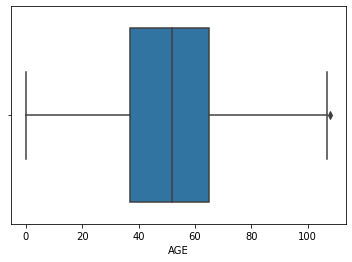

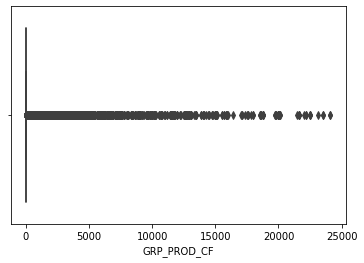

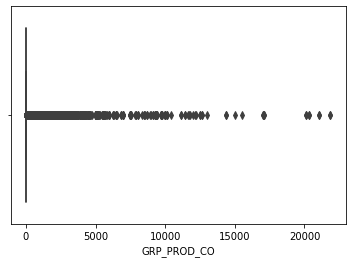

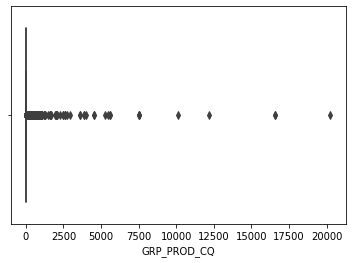

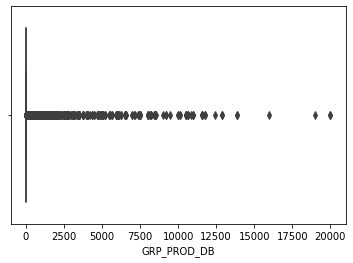

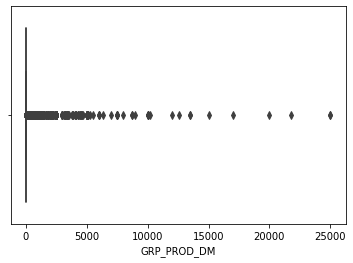

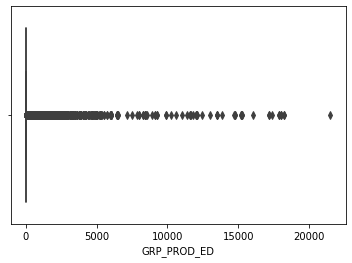

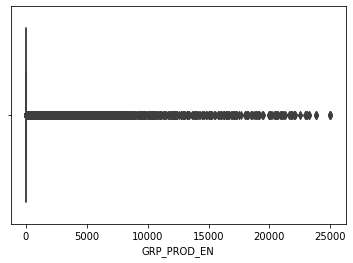

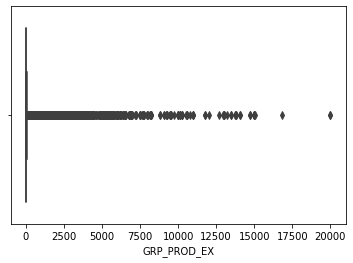

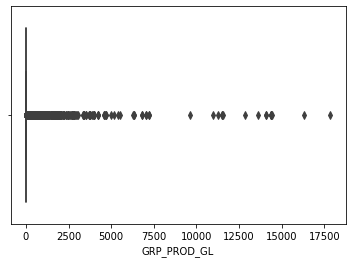

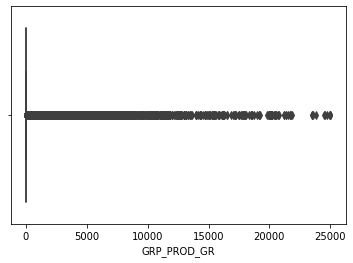

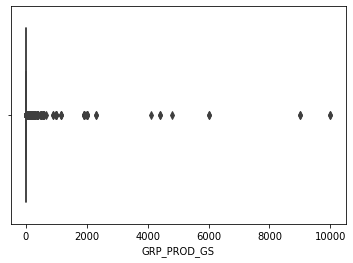

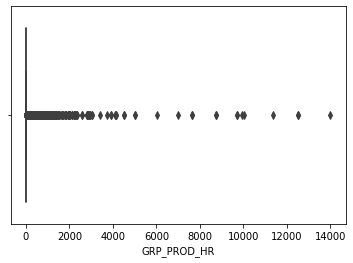

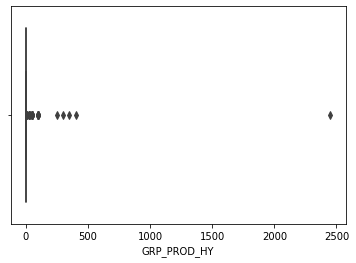

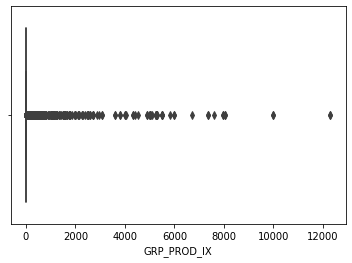

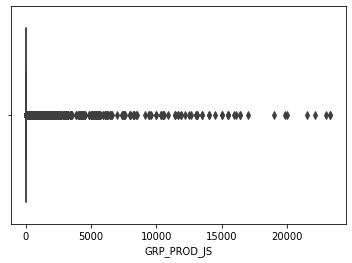

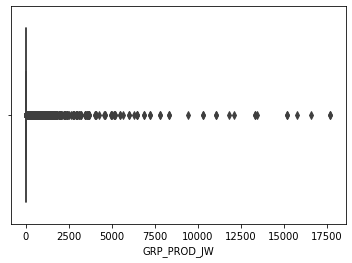

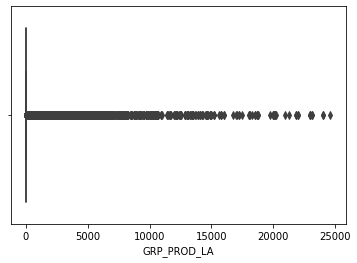

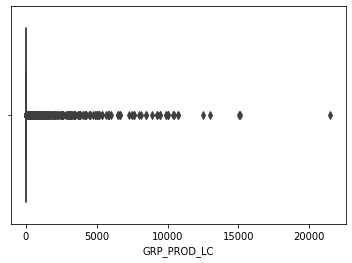

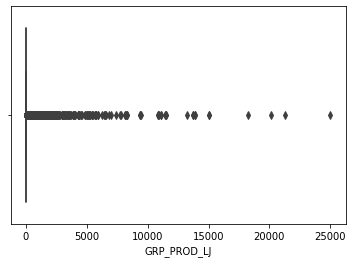

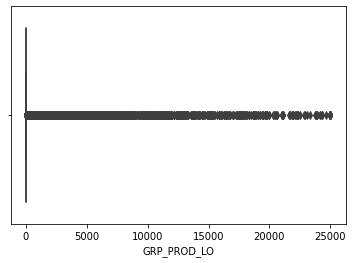

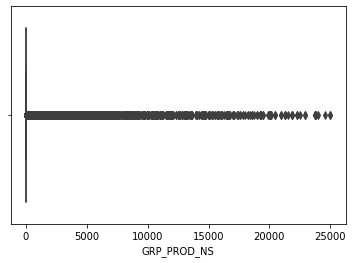

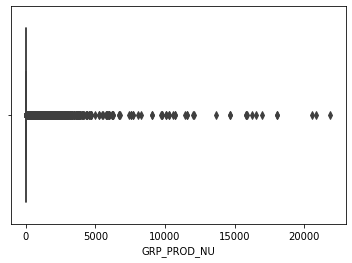

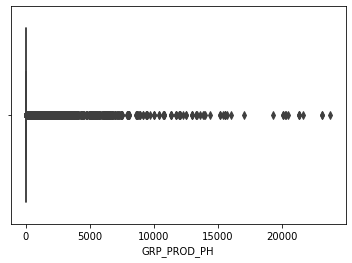

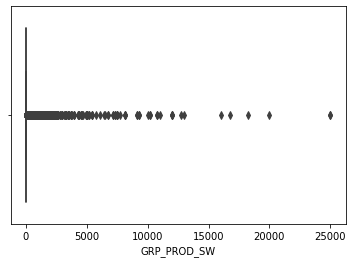

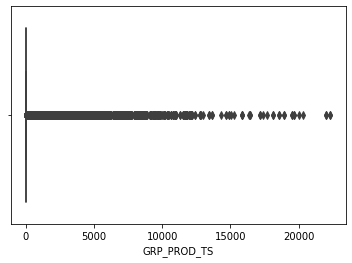

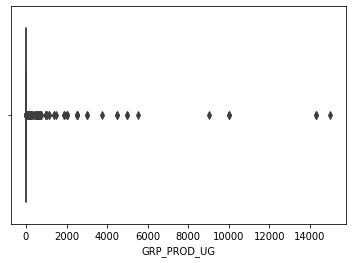

In [ ]:
# Check for outliers
# feature_names -- names of columns that might have outlier in the data

feature_names = ['AGE','GRP_PROD_CF','GRP_PROD_CO','GRP_PROD_CQ','GRP_PROD_DB','GRP_PROD_DM','GRP_PROD_ED','GRP_PROD_EN','GRP_PROD_EX','GRP_PROD_GL','GRP_PROD_GR',
                 'GRP_PROD_GS','GRP_PROD_HR','GRP_PROD_HY','GRP_PROD_IX','GRP_PROD_JS','GRP_PROD_JW','GRP_PROD_LA','GRP_PROD_LC','GRP_PROD_LJ','GRP_PROD_LO','GRP_PROD_NS',
                 'GRP_PROD_NU','GRP_PROD_PH','GRP_PROD_SW','GRP_PROD_TS','GRP_PROD_UG','GRP_PROD_VS']

for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x=feature_names[i], data=df)


In [ ]:
# Getting the observation points that are oulier in the data

In [ ]:
def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out,'\n')

In [ ]:
for col in feature_names:
  print(col,'\n')
  Zscore_outlier(df[col])

AGE 

Outliers: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 105.0, 105.0, 105.0, 107.0, 105.0, 107.0, 106.0, 105.0, 108.0] 

GRP_PROD_CF 

Outliers: [17000.0, 18500.0, 17500.0, 4480.0, 6040.0, 2650.0, 2895.0, 15900.0, 3000.0, 5000.0, 5000.0, 6000.0, 3000.0, 6879.0, 3655.0, 3896.0, 4500.0, 8100.0, 3000.0, 3000.0, 15000.0, 4500.0, 6600.0, 4480.0, 8400.0, 12000.0, 3850.0, 3600.0, 3000.0, 4352.0, 6250.0, 2988.0, 3920.0, 12552.0, 3000.0, 5880.0, 2900.0, 3170.0, 12000.0, 4600.0, 2800.0, 2500.0, 6000.0, 3894.25, 18762.0, 11604.47, 3345.0, 4875.0, 14738.0, 4826.0, 8600.0, 13050.0, 7486.0, 5000.0, 3900.0, 20000.0, 24102.0, 3175.0, 4812.0, 2720.0, 6600.0, 2700.0, 22500.0, 3000.0, 4600.0, 6000.0, 6600.0, 6340.0, 5000.0, 8376.0, 5858.0, 9550.0, 5000.0, 2772.0, 9850.0, 2925.0, 10900.0, 5050.0, 5000.0, 5900.0, 6830.0, 6200.0, 3180.0, 7630.0, 3564.0, 7024.18, 15000.0, 6699.0, 6900.0, 2504.0, 4000.0, 6217.59, 11372.0, 4200.0, 2872.0, 3170.0, 3180.0, 2816.0, 2870.0, 3456.0, 10604.0, 3124.0, 7480.0, 4

In [ ]:
df['RANDOM_ID'].value_counts()

HGDN3GPH    1
9JGTJBNT    1
EKQA0PDP    1
5YJLOXUH    1
4NXBGJGB    1
           ..
624C84UJ    1
MOH2MFC5    1
PTBTNSRM    1
Y0LE78QX    1
ZESGIYQF    1
Name: RANDOM_ID, Length: 91631, dtype: int64

## Merging the giving amount data and demographics data

In [ ]:
df_amnt = pd.read_csv("Gift_total_by_CSU_Since_FY2015.csv")

In [ ]:
df_amnt.head()

,RANDOM_ID,CSU_CODE,FISCAL_YEAR_ENDING,DONOR_INTENT_ID,TOTAL_AMT_2015_2020
0,THTKM076,CF,2020,5294631,50.0
1,THTKM076,DM,2016,205965,25.0
2,THTKM076,NS,2019,4808641,25.0
3,THTKM076,NS,2018,4447701,50.0
4,THTKM076,NS,2017,264264,25.0


In [ ]:
# Check the total number of observations in the dataset
print('Total number of observations in the dataset are:', df_amnt.shape[0])

Total number of observations in the dataset are: 258148


In [ ]:
# Check if data has duplicate entries

print(df_amnt.shape)
df_amnt = df_amnt.drop_duplicates(keep='first')
print('Shape after dropping the values: ', df_amnt.shape)

(258148, 5)
Shape after dropping the values:  (258148, 5)


In [ ]:
# Check for missing values
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df_amnt.columns:
    nullcount = df_amnt[col].isnull().sum()
    pct_missing = np.mean(df_amnt[col].isnull())
    if(pct_missing>0):
      print('{} {} - {}%'.format(col, nullcount, round(pct_missing*100)))

In [ ]:
check_col = ['CSU_CODE','FISCAL_YEAR_ENDING','DONOR_INTENT_ID','RANDOM_ID']
#-Check for zero values that shouldn't be there e.g. age, text, year

for col in check_col:
  count = 0
  for i in df_amnt[col]:
    if(i==0):
      count+=1
  print('Number of zeroes in ',col,'is -',count)

Number of zeroes in  CSU_CODE is - 0
Number of zeroes in  FISCAL_YEAR_ENDING is - 0
Number of zeroes in  DONOR_INTENT_ID is - 0
Number of zeroes in  RANDOM_ID is - 0


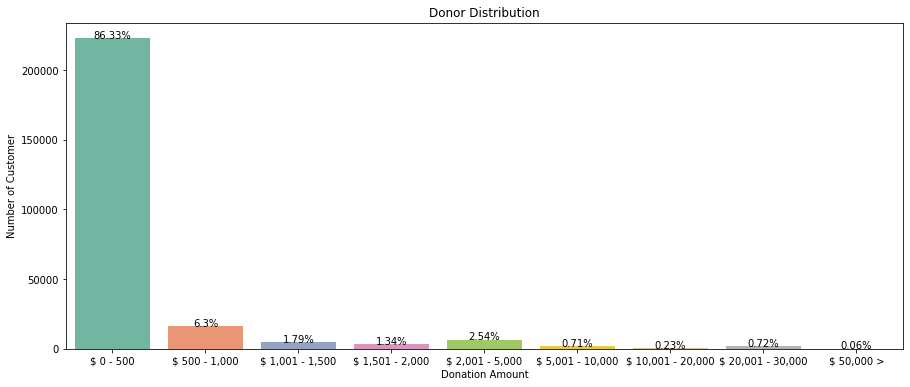

In [ ]:
ta0_500 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] >= 0) & (df_amnt["TOTAL_AMT_2015_2020"] <= 500)]
ta500_1000 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 500) & (df_amnt["TOTAL_AMT_2015_2020"] <= 1000)]
ta1000_1500 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 1000) & (df_amnt["TOTAL_AMT_2015_2020"] <= 1500)]
ta1500_2000 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 1500) & (df_amnt["TOTAL_AMT_2015_2020"] <= 2000)]
ta2000_5000 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 2000) & (df_amnt["TOTAL_AMT_2015_2020"] <= 5000)]
ta5000_10000 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 5000) & (df_amnt["TOTAL_AMT_2015_2020"] <= 10000)]
ta1000_20000 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 10000) & (df_amnt["TOTAL_AMT_2015_2020"] <= 20000)]
ta2000_30000 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 20000) & (df_amnt["TOTAL_AMT_2015_2020"] <= 50000)]
ta50000 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 50000)]

aix = ["$ 0 - 500", "$ 500 - 1,000", "$ 1,001 - 1,500", "$ 1,501 - 2,000", "$ 2,001 - 5,000","$ 5,001 - 10,000","$ 10,001 - 20,000","$ 20,001 - 30,000","$ 50,000 >"]
aiy = [len(ta0_500.values), len(ta500_1000.values), len(ta1000_1500.values), len(ta1500_2000.values), len(ta2000_5000.values),len(ta5000_10000),len(ta1000_20000),len(ta2000_30000),len(ta50000)]
total = sum(aiy)
plt.figure(figsize=(15,6))
ax = sns.barplot(x=aix, y=aiy, palette="Set2")


for i, p in enumerate(ax.patches):
    height = p.get_height()
    perc = aiy[i]/total*100
    perc = round(perc,2)
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, str(perc) + "%",ha="center")

plt.title("Donor Distribution")
plt.xlabel("Donation Amount")
plt.ylabel("Number of Customer")
plt.show()

In [ ]:
sum(aiy)

perc = aiy[0]/sum(aiy)*100
round(perc,2)


86.33

258148


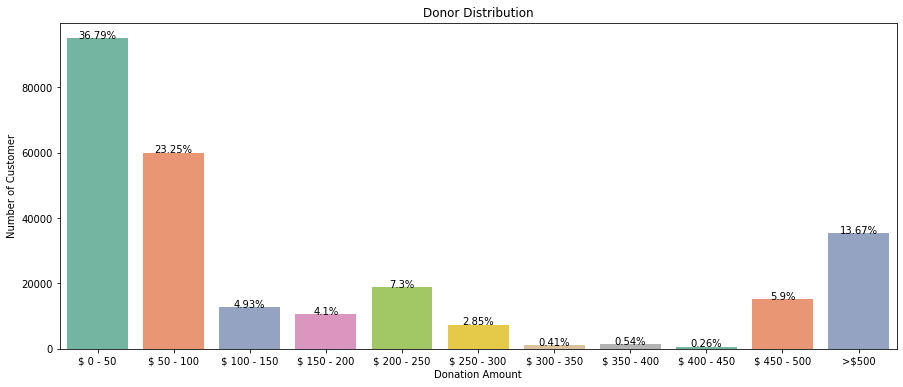

In [ ]:
ta0_50 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] >= 0) & (df_amnt["TOTAL_AMT_2015_2020"] <= 50)]
ta50_100 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 50) & (df_amnt["TOTAL_AMT_2015_2020"] <= 100)]
ta100_150 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 100) & (df_amnt["TOTAL_AMT_2015_2020"] <= 150)]
ta150_200 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 150) & (df_amnt["TOTAL_AMT_2015_2020"] <= 200)]
ta200_250 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 200) & (df_amnt["TOTAL_AMT_2015_2020"] <= 250)]
ta250_300 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 250) & (df_amnt["TOTAL_AMT_2015_2020"] <= 300)]
ta300_350 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 300) & (df_amnt["TOTAL_AMT_2015_2020"] <= 350)]
ta350_400 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 350) & (df_amnt["TOTAL_AMT_2015_2020"] <= 400)]
ta400_450 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 400) & (df_amnt["TOTAL_AMT_2015_2020"] <= 450)]
ta450_500 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 450) & (df_amnt["TOTAL_AMT_2015_2020"] <= 500)]
ta500 = df_amnt["TOTAL_AMT_2015_2020"][(df_amnt["TOTAL_AMT_2015_2020"] > 500)]

aix1 = ["$ 0 - 50", "$ 50 - 100", "$ 100 - 150", "$ 150 - 200", "$ 200 - 250","$ 250 - 300","$ 300 - 350","$ 350 - 400","$ 400 - 450","$ 450 - 500",">$500"]
aiy1 = [len(ta0_50.values), len(ta50_100.values), len(ta100_150.values), len(ta150_200.values), len(ta200_250.values),len(ta250_300),len(ta300_350),len(ta350_400),len(ta400_450),len(ta450_500),len(ta500)]
total = sum(aiy1)
plt.figure(figsize=(15,6))
ax1 = sns.barplot(x=aix1, y=aiy1, palette="Set2")


for i, p in enumerate(ax1.patches):
    height = p.get_height()
    perc = aiy1[i]/total*100
    perc = round(perc,2)
    ax1.text(p.get_x()+p.get_width()/2., height + 0.1, str(perc) + '%',ha="center")

plt.title("Donor Distribution")
plt.xlabel("Donation Amount")
plt.ylabel("Number of Customer")
plt.show()

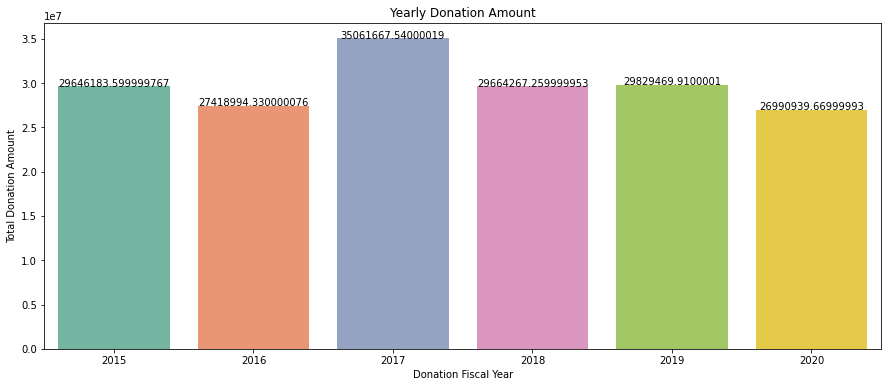

In [ ]:
amnt_per_year = df_amnt.groupby('FISCAL_YEAR_ENDING')['TOTAL_AMT_2015_2020'].sum()
amnt_per_year_df=amnt_per_year.to_frame().reset_index()
amnt_per_year_df

ax = amnt_per_year_df['FISCAL_YEAR_ENDING']
ay = amnt_per_year_df['TOTAL_AMT_2015_2020']

plt.figure(figsize=(15,6))
ax = sns.barplot(x=ax, y=ay, palette="Set2")


for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, ay[i],ha="center")

plt.title("Yearly Donation Amount")
plt.xlabel("Donation Fiscal Year")
plt.ylabel("Total Donation Amount")
plt.show()

# Donation amount in 2020 was 26 million approx

In [ ]:
giving_year_count = df_amnt.groupby(['RANDOM_ID','FISCAL_YEAR_ENDING'])['TOTAL_AMT_2015_2020'].sum()

In [ ]:
user_yearly_data =  giving_year_count.to_frame().reset_index()
print(user_yearly_data)

       RANDOM_ID  FISCAL_YEAR_ENDING  TOTAL_AMT_2015_2020
0       00017EH9                2015                15.00
1       000V0H91                2015               250.00
2       001J3BUD                2015               500.00
3       001J3BUD                2018                25.00
4       001J3BUD                2020               294.23
...          ...                 ...                  ...
204253  ZZZC54VI                2015              1499.94
204254  ZZZC54VI                2017              4999.80
204255  ZZZPEPYG                2018               100.00
204256  ZZZPEPYG                2019               100.00
204257  ZZZPEPYG                2020               250.00

[204258 rows x 3 columns]


In [ ]:
user_yearly_data

,RANDOM_ID,FISCAL_YEAR_ENDING,TOTAL_AMT_2015_2020
0,00017EH9,2015,15.00
1,000V0H91,2015,250.00
2,001J3BUD,2015,500.00
3,001J3BUD,2018,25.00
4,001J3BUD,2020,294.23
...,...,...,...
204253,ZZZC54VI,2015,1499.94
204254,ZZZC54VI,2017,4999.80
204255,ZZZPEPYG,2018,100.00
204256,ZZZPEPYG,2019,100.00


In [ ]:
user_yearly_data_df = user_yearly_data.groupby(['RANDOM_ID']).nunique()
user_yearly_data_df

,FISCAL_YEAR_ENDING,TOTAL_AMT_2015_2020
RANDOM_ID,,
00017EH9,1,1
000V0H91,1,1
001J3BUD,3,3
001RB8B4,1,1
001TY1IF,5,3
...,...,...
ZZYT6KZ6,3,1
ZZZ7S81M,1,1
ZZZBT9C0,1,1


In [ ]:
user_yearly_data_df = user_yearly_data_df.drop(columns=['TOTAL_AMT_2015_2020'])
user_yearly_data_df = user_yearly_data_df.rename(columns={'index': 'RANDOM_ID','FISCAL_YEAR_ENDING':'Giving_Year_Count'}).reset_index()

In [ ]:
test = user_yearly_data_df['Giving_Year_Count'].value_counts() 
test

1    54694
2    16259
3     9298
4     6840
5     5870
6     5407
Name: Giving_Year_Count, dtype: int64

In [ ]:
year_data = dict(test)
donor_count = sum(test)
year_list = list(year_data.values())
print(year_data)
print('Total people who have donated: ',donor_count)

{1: 54694, 2: 16259, 3: 9298, 4: 6840, 5: 5870, 6: 5407}
Total people who have donated:  98368


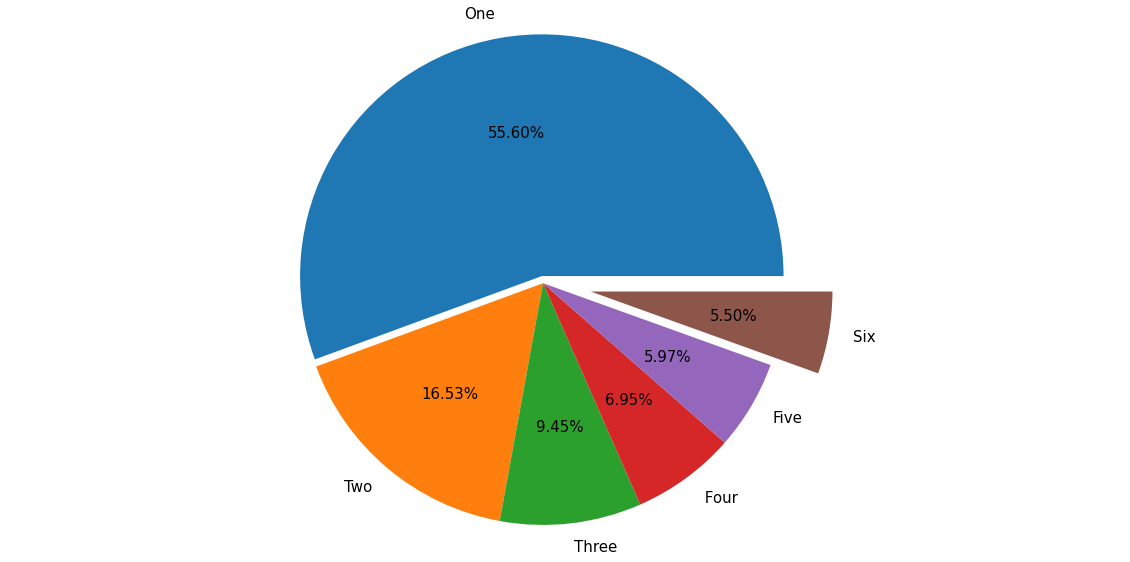

In [ ]:
#Pie Chart showing donor distribution
year_list

my_labels = 'One','Two','Three', ' Four','Five','Six'
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize=(20,10))
explode = [0.03,0,0,0,0,0.2] # To slice the perticuler section
plt.pie(year_list,labels=my_labels,autopct='%1.2f%%',explode=explode,textprops=textprops)
plt.axis('equal')
plt.show()

In [ ]:
dum_df = pd.get_dummies(df_amnt, columns=["FISCAL_YEAR_ENDING"], prefix=["Donation_Year_"])
dum_df

,RANDOM_ID,CSU_CODE,DONOR_INTENT_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020
0,THTKM076,CF,5294631,50.00,0,0,0,0,0,1
1,THTKM076,DM,205965,25.00,0,1,0,0,0,0
2,THTKM076,NS,4808641,25.00,0,0,0,0,1,0
3,THTKM076,NS,4447701,50.00,0,0,0,1,0,0
4,THTKM076,NS,264264,25.00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
258143,PCX8A1SP,GR,3224609,100.00,1,0,0,0,0,0
258144,F3JAEMON,LA,3492004,40.00,1,0,0,0,0,0
258145,NQVCEOG8,NS,72452,100.00,1,0,0,0,0,0
258146,KL31U0S6,ED,83353,20.15,1,0,0,0,0,0


In [ ]:
## data pre processing
## Drop CSU_CODE and DONOR_INTENT_ID
dum_df = dum_df .drop(columns=['CSU_CODE','DONOR_INTENT_ID'])
dum_df

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020
0,THTKM076,50.00,0,0,0,0,0,1
1,THTKM076,25.00,0,1,0,0,0,0
2,THTKM076,25.00,0,0,0,0,1,0
3,THTKM076,50.00,0,0,0,1,0,0
4,THTKM076,25.00,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
258143,PCX8A1SP,100.00,1,0,0,0,0,0
258144,F3JAEMON,40.00,1,0,0,0,0,0
258145,NQVCEOG8,100.00,1,0,0,0,0,0
258146,KL31U0S6,20.15,1,0,0,0,0,0


In [ ]:
giving_pattern_df = dum_df.groupby(by='RANDOM_ID').agg({'TOTAL_AMT_2015_2020': 'sum',
                              'Donation_Year__2015': 'sum',
                              'Donation_Year__2016': 'sum',
                              'Donation_Year__2017': 'sum',
                              'Donation_Year__2018': 'sum',
                              'Donation_Year__2019':'sum',
                              'Donation_Year__2020':'sum'}).reset_index()

In [ ]:
giving_pattern_df

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020
0,00017EH9,15.00,1,0,0,0,0,0
1,000V0H91,250.00,1,0,0,0,0,0
2,001J3BUD,819.23,1,0,0,1,0,2
3,001RB8B4,485.14,0,0,0,0,2,0
4,001TY1IF,1050.00,1,1,1,1,0,3
...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1
98364,ZZZ7S81M,500.00,0,1,0,0,0,0
98365,ZZZBT9C0,35.00,0,0,0,0,1,0
98366,ZZZC54VI,6499.74,1,0,1,0,0,0


In [ ]:
#user_yearly_data_df 
df_merge = pd.merge(left=giving_pattern_df, right=user_yearly_data_df, left_on='RANDOM_ID', right_on='RANDOM_ID',how='left')
df_merge

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Giving_Year_Count
0,00017EH9,15.00,1,0,0,0,0,0,1
1,000V0H91,250.00,1,0,0,0,0,0,1
2,001J3BUD,819.23,1,0,0,1,0,2,3
3,001RB8B4,485.14,0,0,0,0,2,0,1
4,001TY1IF,1050.00,1,1,1,1,0,3,5
...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,3
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,1
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,1
98366,ZZZC54VI,6499.74,1,0,1,0,0,0,2


In [ ]:
def number_of_years_skipped(Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020):

  if ((Donation_Year__2015>0 and Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2016>0 and Donation_Year__2018 >0 and Donation_Year__2020 >0)):
    return 0
  elif ((Donation_Year__2015>0 and Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2016 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 1

  elif ((Donation_Year__2016>0 and Donation_Year__2018>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 ==0)):
    return 1
  
  elif ((Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 1

  elif ((Donation_Year__2018>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 ==0)):
    return 1

  elif ((Donation_Year__2017>0 and Donation_Year__2019>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 1

  
  ### skips two year

  elif ((Donation_Year__2015>0 and Donation_Year__2018>0) and (Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 == 0 and Donation_Year__2020 ==0)):
    return 2

  elif ((Donation_Year__2016>0 and Donation_Year__2019>0) and (Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2015 == 0 and Donation_Year__2020 ==0)):
    return 2
  
  elif ((Donation_Year__2017>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2019 ==0)):
    return 2

    ### skips three year

  elif ((Donation_Year__2015>0 and Donation_Year__2019>0) and (Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2020 ==0)):
    return 3

  elif ((Donation_Year__2016>0 and Donation_Year__2020>0) and (Donation_Year__2015 == 0 and Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2019 ==0)):
    return 3

    ### skips four year

  elif ((Donation_Year__2015>0 and Donation_Year__2020>0) and (Donation_Year__2016 == 0 and Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2019 ==0)):
    return 4

  else:
    return 5



In [ ]:
df_merge['Skip_Years'] = df_merge.apply(lambda x: number_of_years_skipped(x['Donation_Year__2015'],x['Donation_Year__2016'],x['Donation_Year__2017'],x['Donation_Year__2018'],
                           x['Donation_Year__2019'],x['Donation_Year__2020']),axis=1)

In [ ]:
def is_2020_first_year(Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020):
  if(((Donation_Year__2015==0 and Donation_Year__2016==0) and (Donation_Year__2017 == 0 and Donation_Year__2018 == 0 and Donation_Year__2019 == 0 and Donation_Year__2020>0))):
    return 1
  else:
    return 0


In [ ]:
df_merge['Is_2020_first_year'] = df_merge.apply(lambda x: is_2020_first_year(x['Donation_Year__2015'],x['Donation_Year__2016'],x['Donation_Year__2017'],x['Donation_Year__2018'],
                           x['Donation_Year__2019'],x['Donation_Year__2020']),axis=1)

In [ ]:
df_merge

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Giving_Year_Count,Skip_Years,Is_2020_first_year
0,00017EH9,15.00,1,0,0,0,0,0,1,5,0
1,000V0H91,250.00,1,0,0,0,0,0,1,5,0
2,001J3BUD,819.23,1,0,0,1,0,2,3,5,0
3,001RB8B4,485.14,0,0,0,0,2,0,1,5,0
4,001TY1IF,1050.00,1,1,1,1,0,3,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,3,5,0
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,1,5,0
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,1,5,0
98366,ZZZC54VI,6499.74,1,0,1,0,0,0,2,5,0


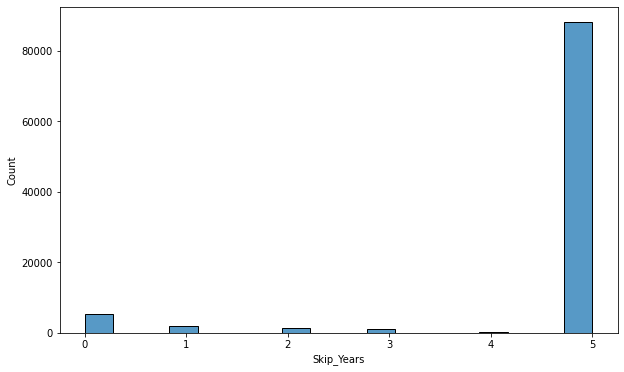

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_merge['Skip_Years'])

In [ ]:
skip_list = df_merge['Skip_Years'].value_counts()
skip_data = dict(skip_list)
skip_yr_list = list(skip_data.values())
print(skip_data)
skip_yr_list

{5: 88147, 0: 5407, 1: 2006, 2: 1436, 3: 1020, 4: 352}


[88147, 5407, 2006, 1436, 1020, 352]

In [ ]:

cnt_list=df_merge["Is_2020_first_year"].value_counts()
print(cnt_list)

print("Percentage of people who donated for the first time in 2020: ",round(cnt_list[1]/sum(cnt_list),3))

0    89838
1     8530
Name: Is_2020_first_year, dtype: int64
Percentage of people who donated for the first time in 2020:  0.087


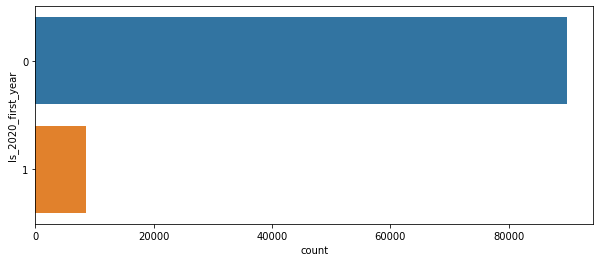

In [ ]:
plt.figure(1 , figsize = (10 , 4))
sns.countplot(y = 'Is_2020_first_year' , data = df_merge)
plt.show()

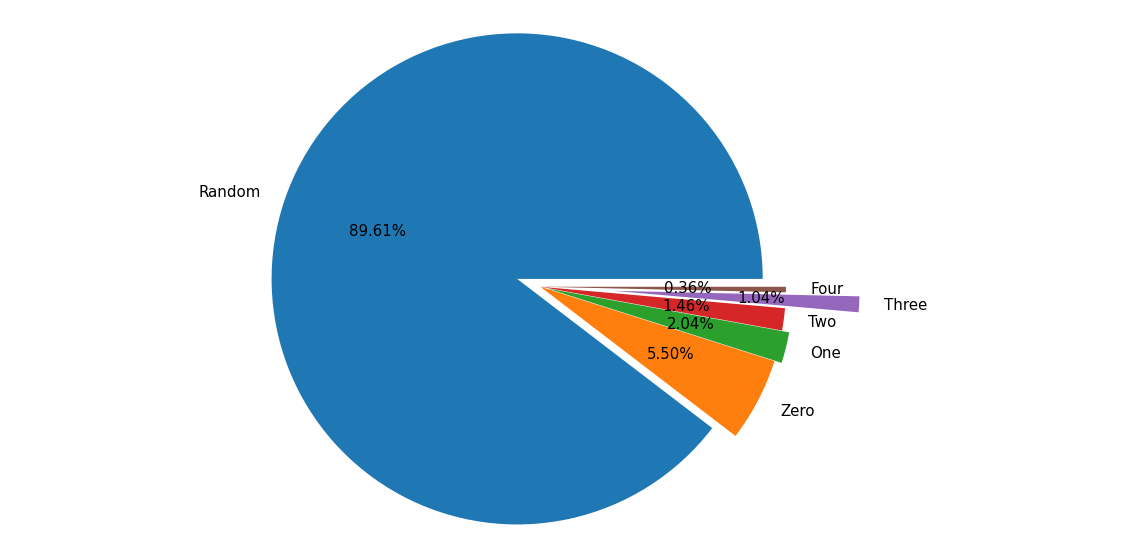

In [ ]:
### plotting the skipping pattern
#Pie Chart showing donor distribution


skip_labels = 'Random','Zero','One', 'Two','Three','Four'
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize=(20,10))
explode = [0.1,0.0,0.03,0.,0.3,0.0] # To slice the perticuler section
plt.pie(skip_yr_list,labels=skip_labels,explode=explode, autopct='%1.2f%%',textprops=textprops)
plt.axis('equal')
plt.show()

In [ ]:
dum_df1 = pd.get_dummies(df_merge, columns=["Giving_Year_Count"], prefix=["Giving_Year_Count_"])
dum_df1 

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Skip_Years,Is_2020_first_year,Giving_Year_Count__1,Giving_Year_Count__2,Giving_Year_Count__3,Giving_Year_Count__4,Giving_Year_Count__5,Giving_Year_Count__6
0,00017EH9,15.00,1,0,0,0,0,0,5,0,1,0,0,0,0,0
1,000V0H91,250.00,1,0,0,0,0,0,5,0,1,0,0,0,0,0
2,001J3BUD,819.23,1,0,0,1,0,2,5,0,0,0,1,0,0,0
3,001RB8B4,485.14,0,0,0,0,2,0,5,0,1,0,0,0,0,0
4,001TY1IF,1050.00,1,1,1,1,0,3,5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,5,0,0,0,1,0,0,0
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,5,0,1,0,0,0,0,0
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,5,0,1,0,0,0,0,0
98366,ZZZC54VI,6499.74,1,0,1,0,0,0,5,0,0,1,0,0,0,0


In [ ]:
dum_df2 = pd.get_dummies(dum_df1, columns=["Skip_Years"], prefix=["Skip_Years_Count_"])
dum_df2 

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Is_2020_first_year,Giving_Year_Count__1,Giving_Year_Count__2,Giving_Year_Count__3,Giving_Year_Count__4,Giving_Year_Count__5,Giving_Year_Count__6,Skip_Years_Count__0,Skip_Years_Count__1,Skip_Years_Count__2,Skip_Years_Count__3,Skip_Years_Count__4,Skip_Years_Count__5
0,00017EH9,15.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,000V0H91,250.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,001J3BUD,819.23,1,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1
3,001RB8B4,485.14,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,001TY1IF,1050.00,1,1,1,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
98366,ZZZC54VI,6499.74,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_corr = dum_df2[['Giving_Year_Count__1','Giving_Year_Count__2','Giving_Year_Count__3','Giving_Year_Count__4','Giving_Year_Count__5','Giving_Year_Count__6']]

In [ ]:
corrMatrix1 = df_corr.corr()

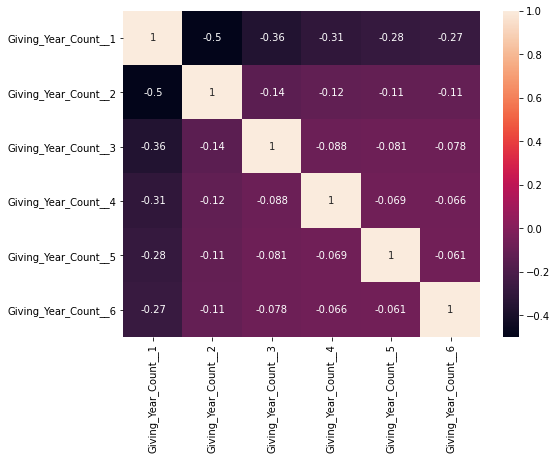

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corrMatrix1, annot=True)
plt.show()

In [ ]:
df_corr_skip = dum_df2[['Skip_Years_Count__1','Skip_Years_Count__2','Skip_Years_Count__3','Skip_Years_Count__4']]

In [ ]:
corrMatrix2 = df_corr_skip.corr()

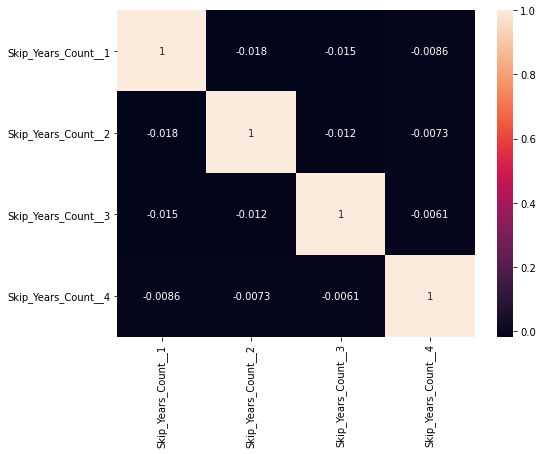

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corrMatrix2, annot=True)
plt.show()

In [ ]:
final_corr = dum_df2[['Giving_Year_Count__1','Giving_Year_Count__2','Giving_Year_Count__3','Giving_Year_Count__4','Giving_Year_Count__5','Giving_Year_Count__6','Skip_Years_Count__1','Skip_Years_Count__2','Skip_Years_Count__3','Skip_Years_Count__4']]

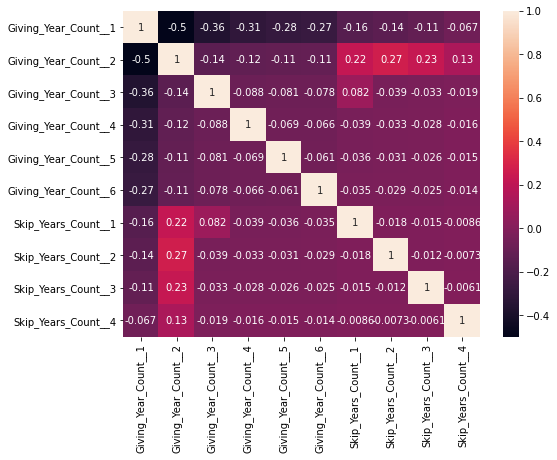

In [ ]:
plt.figure(figsize=(8,6))
corrMatrix3 = final_corr.corr()
sns.heatmap(corrMatrix3, annot=True)
plt.show()

## Merge data with Bio Base data

In [ ]:
df_data = pd.merge(left = dum_df2, right = df, left_on = "RANDOM_ID", right_on = "RANDOM_ID", how ='left')

In [ ]:
df_data

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Is_2020_first_year,Giving_Year_Count__1,Giving_Year_Count__2,Giving_Year_Count__3,Giving_Year_Count__4,Giving_Year_Count__5,Giving_Year_Count__6,Skip_Years_Count__0,Skip_Years_Count__1,Skip_Years_Count__2,Skip_Years_Count__3,Skip_Years_Count__4,Skip_Years_Count__5,AGE,PROFESSIONAL_SUFFIX,PROFESSIONAL_SUFFIX_IND,GENDER,GENERATION,HH_CAPACITY_RANGE,CAMPAIGN_ROLLUP_CAPACITY,LINK_TO_UT,EX_MEMBER,ETHNICITY,MARITAL_STATUS,MSA,PREF_STATE,PREF_ZIPCODE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,...,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,LAST_GIVING_DATE,FIRST_GIVING_DATE,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
0,00017EH9,15.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,33.0,Ph.D.,1.0,M,Gen Y,NaN,z - Unknown,Alumni,Not a Member,NaN,Unknown,West Coast States,CA,94070-4866,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23-Oct-14,23-Oct-14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000V0H91,250.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,0.0,M,NaN,25000.0,I - $25K-$99.9K,Parent,Not a Member,NaN,NaN,Texas Metropolitan,TX,75093-3458,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20-May-15,20-May-15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001J3BUD,819.23,1,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,35.0,NaN,0.0,F,Gen Y,25000.0,J - $25K-$49.9K,Alumni,Not a Member,Asian Am,Unknown,Tri-States,PA,19123-2242,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29-Jan-20,21-Apr-14,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001RB8B4,485.14,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,0.0,M,NaN,NaN,z - Unknown,Friend,Not a Member,NaN,Single,Other,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15-Mar-19,15-Mar-19,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001TY1IF,1050.00,1,1,1,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,1,69.0,NaN,0.0,F,Boomer,100000.0,G - $100K-$999.9K,Friend,Life Member,NaN,Married,Texas Metropolitan,TX,77056-2710,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18-Dec-19,28-Jun-00,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,96.0,NaN,0.0,F,G.I.,NaN,z - Unknown,Alumni,Short-term Member,NaN,Widowed,Texas Small Towns,TX,75757-9317,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12-Jun-20,30-Dec-75,22.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,48.0,NaN,0.0,F,Gen X,NaN,z - Unknown,Friend,Not a Member,NaN,Unknown,Austin Tx,TX,78664-6141,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1-May-16,20-Aug-14,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,76.0,NaN,0.0,F,Boom

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98368 entries, 0 to 98367
Columns: 139 entries, RANDOM_ID to GRP_PG_CNT
dtypes: float64(103), object(18), uint8(18)
memory usage: 93.2+ MB


In [ ]:
df_data.dropna(thresh=120,inplace=True)

In [ ]:
df_data

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Giving_Year_Count__1,Giving_Year_Count__2,Giving_Year_Count__3,Giving_Year_Count__4,Giving_Year_Count__5,Giving_Year_Count__6,Skip_Years_Count__0,Skip_Years_Count__1,Skip_Years_Count__2,Skip_Years_Count__3,Skip_Years_Count__4,Skip_Years_Count__5,AGE,PROFESSIONAL_SUFFIX,PROFESSIONAL_SUFFIX_IND,GENDER,GENERATION,HH_CAPACITY_RANGE,CAMPAIGN_ROLLUP_CAPACITY,LINK_TO_UT,EX_MEMBER,ETHNICITY,MARITAL_STATUS,MSA,PREF_STATE,PREF_ZIPCODE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,...,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,LAST_GIVING_DATE,FIRST_GIVING_DATE,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
0,00017EH9,15.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,33.0,Ph.D.,1.0,M,Gen Y,NaN,z - Unknown,Alumni,Not a Member,NaN,Unknown,West Coast States,CA,94070-4866,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,23-Oct-14,23-Oct-14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000V0H91,250.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,0.0,M,NaN,25000.0,I - $25K-$99.9K,Parent,Not a Member,NaN,NaN,Texas Metropolitan,TX,75093-3458,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20-May-15,20-May-15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001J3BUD,819.23,1,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,1,35.0,NaN,0.0,F,Gen Y,25000.0,J - $25K-$49.9K,Alumni,Not a Member,Asian Am,Unknown,Tri-States,PA,19123-2242,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29-Jan-20,21-Apr-14,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001RB8B4,485.14,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,0.0,M,NaN,NaN,z - Unknown,Friend,Not a Member,NaN,Single,Other,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15-Mar-19,15-Mar-19,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001TY1IF,1050.00,1,1,1,1,0,3,0,0,0,0,1,0,0,0,0,0,0,1,69.0,NaN,0.0,F,Boomer,100000.0,G - $100K-$999.9K,Friend,Life Member,NaN,Married,Texas Metropolitan,TX,77056-2710,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18-Dec-19,28-Jun-00,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,96.0,NaN,0.0,F,G.I.,NaN,z - Unknown,Alumni,Short-term Member,NaN,Widowed,Texas Small Towns,TX,75757-9317,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12-Jun-20,30-Dec-75,22.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,48.0,NaN,0.0,F,Gen X,NaN,z - Unknown,Friend,Not a Member,NaN,Unknown,Austin Tx,TX,78664-6141,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1-May-16,20-Aug-14,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,76.0,NaN,0.0,F,B

In [ ]:
df_data.to_csv('test.csv')

In [ ]:
df_data.isnull().sum()

RANDOM_ID              0
TOTAL_AMT_2015_2020    0
Donation_Year__2015    0
Donation_Year__2016    0
Donation_Year__2017    0
                      ..
GRP_CNT_SW             0
GRP_CNT_TS             0
GRP_CNT_UG             0
GRP_CNT_VS             0
GRP_PG_CNT             0
Length: 139, dtype: int64

In [ ]:
# Check for missing values
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df_data.columns:
    nullcount = df_data[col].isnull().sum()
    pct_missing = np.mean(df_data[col].isnull())
    if(pct_missing>0):
      print('{} {} - {}%'.format(col, nullcount, round(pct_missing*100)))
   

AGE 20495 - 22%
PROFESSIONAL_SUFFIX 83865 - 92%
GENDER 473 - 1%
GENERATION 20495 - 22%
HH_CAPACITY_RANGE 46782 - 51%
EX_MEMBER 319 - 0%
ETHNICITY 41541 - 45%
MARITAL_STATUS 2305 - 3%
PREF_STATE 1434 - 2%
PREF_ZIPCODE 507 - 1%
FIRST_DEGREE 33309 - 36%
SECOND_DEGREE 80592 - 88%
FINAL_DEGREE 90551 - 99%


In [ ]:
df_data

,RANDOM_ID,TOTAL_AMT_2015_2020,Donation_Year__2015,Donation_Year__2016,Donation_Year__2017,Donation_Year__2018,Donation_Year__2019,Donation_Year__2020,Giving_Year_Count__1,Giving_Year_Count__2,Giving_Year_Count__3,Giving_Year_Count__4,Giving_Year_Count__5,Giving_Year_Count__6,Skip_Years_Count__0,Skip_Years_Count__1,Skip_Years_Count__2,Skip_Years_Count__3,Skip_Years_Count__4,Skip_Years_Count__5,AGE,PROFESSIONAL_SUFFIX,PROFESSIONAL_SUFFIX_IND,GENDER,GENERATION,HH_CAPACITY_RANGE,CAMPAIGN_ROLLUP_CAPACITY,LINK_TO_UT,EX_MEMBER,ETHNICITY,MARITAL_STATUS,MSA,PREF_STATE,PREF_ZIPCODE,DEGREE_GR,DEGREE_CF,DEGREE_GL,DEGREE_JS,DEGREE_CO,DEGREE_EN,...,GRP_PROD_PH,GRP_PROD_SW,GRP_PROD_TS,GRP_PROD_UG,GRP_PROD_VS,LAST_GIVING_DATE,FIRST_GIVING_DATE,TOTAL_YRS_GIVEN,GIFT_CNT,GRP_CNT_AF,GRP_CNT_AT,GRP_CNT_BL,GRP_CNT_CF,GRP_CNT_CO,GRP_CNT_CQ,GRP_CNT_DB,GRP_CNT_DM,GRP_CNT_ED,GRP_CNT_EN,GRP_CNT_EX,GRP_CNT_GL,GRP_CNT_GR,GRP_CNT_GS,GRP_CNT_HR,GRP_CNT_HY,GRP_CNT_IX,GRP_CNT_JS,GRP_CNT_JW,GRP_CNT_LA,GRP_CNT_LC,GRP_CNT_LJ,GRP_CNT_LO,GRP_CNT_NS,GRP_CNT_NU,GRP_CNT_PH,GRP_CNT_SW,GRP_CNT_TS,GRP_CNT_UG,GRP_CNT_VS,GRP_PG_CNT
0,00017EH9,15.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,33.0,Ph.D.,1.0,M,Gen Y,NaN,z - Unknown,Alumni,Not a Member,NaN,Unknown,West Coast States,CA,94070-4866,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,23-Oct-14,23-Oct-14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000V0H91,250.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,0.0,M,NaN,25000.0,I - $25K-$99.9K,Parent,Not a Member,NaN,NaN,Texas Metropolitan,TX,75093-3458,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20-May-15,20-May-15,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001J3BUD,819.23,1,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,1,35.0,NaN,0.0,F,Gen Y,25000.0,J - $25K-$49.9K,Alumni,Not a Member,Asian Am,Unknown,Tri-States,PA,19123-2242,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29-Jan-20,21-Apr-14,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001RB8B4,485.14,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,0.0,M,NaN,NaN,z - Unknown,Friend,Not a Member,NaN,Single,Other,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15-Mar-19,15-Mar-19,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001TY1IF,1050.00,1,1,1,1,0,3,0,0,0,0,1,0,0,0,0,0,0,1,69.0,NaN,0.0,F,Boomer,100000.0,G - $100K-$999.9K,Friend,Life Member,NaN,Married,Texas Metropolitan,TX,77056-2710,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18-Dec-19,28-Jun-00,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98363,ZZYT6KZ6,150.00,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,96.0,NaN,0.0,F,G.I.,NaN,z - Unknown,Alumni,Short-term Member,NaN,Widowed,Texas Small Towns,TX,75757-9317,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12-Jun-20,30-Dec-75,22.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98364,ZZZ7S81M,500.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,48.0,NaN,0.0,F,Gen X,NaN,z - Unknown,Friend,Not a Member,NaN,Unknown,Austin Tx,TX,78664-6141,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1-May-16,20-Aug-14,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98365,ZZZBT9C0,35.00,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,76.0,NaN,0.0,F,B

In [ ]:
# Inspect the categorical variables
df_data.select_dtypes('object').nunique()

RANDOM_ID                     91631
PROFESSIONAL_SUFFIX             122
GENDER                            3
GENERATION                        8
CAMPAIGN_ROLLUP_CAPACITY         16
LINK_TO_UT                        6
EX_MEMBER                         5
ETHNICITY                         5
MARITAL_STATUS                    6
MSA                              20
PREF_STATE                       57
PREF_ZIPCODE                  68306
FIRST_DEGREE                     72
SECOND_DEGREE                    67
FINAL_DEGREE                     39
UT_LAST_DEGREE_MAJOR_TITLE      300
LAST_GIVING_DATE               2168
FIRST_GIVING_DATE             10725
dtype: int64

In [ ]:
selected_columns = df[['TOTAL_AMT_2015_2020','AGE','GENERATION','GENDER', 'HH_CAPACITY_RANGE','LINK_TO_UT','EX_MEMBER','MARITAL_STATUS',
                       'MSA','DEGREE_GR','DEGREE_CF','DEGREE_GL','DEGREE_JS','DEGREE_CO','DEGREE_EN','DEGREE_LO','DEGREE_AT','DEGREE_NS',
                       'DEGREE_ED','DEGREE_LJ','DEGREE_NU','DEGREE_LA','DEGREE_PH','DEGREE_SW','TOTAL_YRS_GIVEN','GIFT_CNT','',


In [ ]:
df_demo = df_data[[]]

In [ ]:
# iterating the columns 
for col in df_data.columns: 
    print(col) 

RANDOM_ID
TOTAL_AMT_2015_2020
Donation_Year__2015
Donation_Year__2016
Donation_Year__2017
Donation_Year__2018
Donation_Year__2019
Donation_Year__2020
Giving_Year_Count__1
Giving_Year_Count__2
Giving_Year_Count__3
Giving_Year_Count__4
Giving_Year_Count__5
Giving_Year_Count__6
Skip_Years_Count__0
Skip_Years_Count__1
Skip_Years_Count__2
Skip_Years_Count__3
Skip_Years_Count__4
Skip_Years_Count__5
AGE
PROFESSIONAL_SUFFIX
PROFESSIONAL_SUFFIX_IND
GENDER
GENERATION
HH_CAPACITY_RANGE
CAMPAIGN_ROLLUP_CAPACITY
LINK_TO_UT
EX_MEMBER
ETHNICITY
MARITAL_STATUS
MSA
PREF_STATE
PREF_ZIPCODE
DEGREE_GR
DEGREE_CF
DEGREE_GL
DEGREE_JS
DEGREE_CO
DEGREE_EN
DEGREE_LO
DEGREE_AT
DEGREE_NS
DEGREE_ED
DEGREE_LJ
DEGREE_NU
DEGREE_LA
DEGREE_PH
DEGREE_SW
UNDERGRAD_IND
POSTGRAD_IND
FIRST_DEGREE
FIRST_DEGYR
SECOND_DEGREE
SECOND_DEGYR
FINAL_DEGREE
FINAL_DEGYR
NUM_DEGREES
MULTI_DEGREE_CSUS_IND
UT_LAST_DEGREE_MAJOR_TITLE
NUMBER_EXT_DEGREE
STEM_DEGREE
IS_ALUMNI
IS_PARENT_OF_ALUMNI
CHILD_IS_ENROLLED
IS_SPOUSE_OF_ALUMI
SPOUSE_IS

In [ ]:
# The distribution of sales each region
df_region = pd.DataFrame(df_data['GENDER'].value_counts()).reset_index()
df_region['Percentage'] = df_region['GENDER'] / df_data['GENDER'].value_counts().sum()
df_region.rename(columns = {'index':'GENDER', 'GENDER':'Total'}, inplace = True)
df_region = df_region.sort_values('Total', ascending = True).reset_index(drop = True)
# The dataframe
df_region = df_data.groupby('GENDER').agg({
    'GENDER': 'count',
    'Units Sold': 'mean',
    'Total Revenue': 'mean',
    'Total Cost': 'mean',
    'Total Profit': 'mean'
    }
).rename(columns = {'Region': 'Total'}).reset_index().sort_values('Total', ascending = True)

SpecificationError: ignored

In [ ]:
df_data['MARITAL_STATUS'].mode()

0    Unknown
dtype: object

In [ ]:
df_data['GENDER'].mode()

0    M
dtype: object

In [ ]:
df_data['MARITAL_STATUS'].value_counts()

Unknown      45653
Married      39400
Single        1491
Widowed       1399
Divorced      1366
Separated       17
Name: MARITAL_STATUS, dtype: int64